In [8]:
import pandas as pd

benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')





In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')


In [12]:
benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'


In [13]:
combined_df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


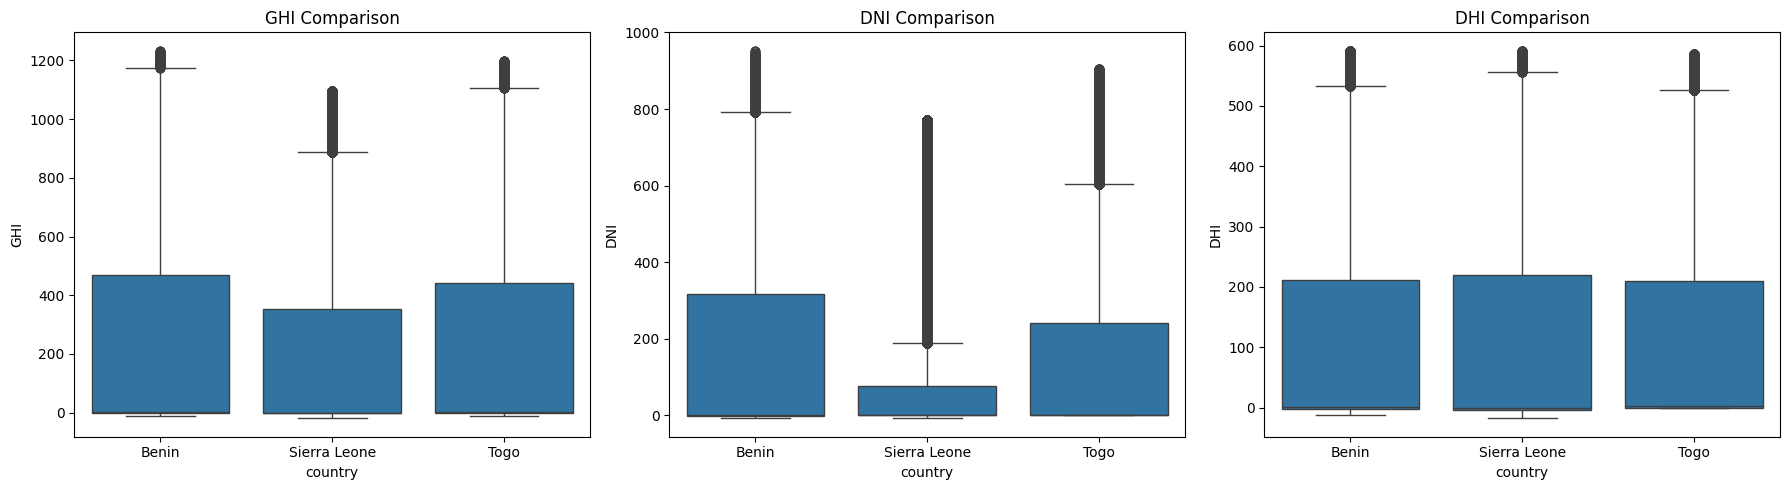

In [14]:
plt.figure(figsize=(18, 5))

# GHI boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='country', y='GHI', data=combined_df)
plt.title('GHI Comparison')

# DNI boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='country', y='DNI', data=combined_df)
plt.title('DNI Comparison')

# DHI boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='country', y='DHI', data=combined_df)
plt.title('DHI Comparison')

plt.tight_layout()
plt.show()


In [15]:
summary = combined_df.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  196.441990    0.3  291.235290  104.527217   -0.1  201.696328   
Togo          229.831936    2.1  321.643747  149.368966    0.0  248.554496   

                     DHI                     
                    mean median         std  
country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  110.109541   -0.1  154.170508  
Togo          112.408673    2.5  151.292938

In [17]:
from scipy.stats import f_oneway, kruskal

ghi_benin = benin['GHI']
ghi_sierra = sierra_leone['GHI']
ghi_togo = togo['GHI']


In [18]:
anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("ANOVA p-value:", anova_result.pvalue)


ANOVA p-value: 0.0


In [20]:
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print("Kruskal–Wallis p-value:", kruskal_result.pvalue)



Kruskal–Wallis p-value: 0.0


### 🔍 Key Observations

Based on the summary statistics of the solar metrics across Benin, Sierra Leone, and Togo, we observe several key differences in solar energy potential:


#### ☀️ GHI (Global Horizontal Irradiance)
- **Benin** has the highest average GHI (**236.23**), closely followed by **Togo** (**229.83**), while **Sierra Leone** is noticeably lower (**196.44**).
- Togo has the **highest median GHI (2.1)**, suggesting its GHI values are skewed with some strong upper values.
- **Sierra Leone** shows both the lowest mean and median, indicating lower overall GHI and weaker solar potential.


#### 🔆 DNI (Direct Normal Irradiance)
- **Benin** again leads with a mean DNI of **166.90**, followed by **Togo** at **149.37**, and **Sierra Leone** at just **104.53**.
- The spread (std) of DNI is highest in Benin (**262.08**) and lowest in Sierra Leone (**201.70**), reflecting more variability in Benin’s direct sunlight.


#### 🌤️ DHI (Diffuse Horizontal Irradiance)
- All three countries have fairly close DHI averages (~110–112), but **Togo** has the highest mean at **112.41**.
- Interestingly, Togo also has the **highest median DHI (2.5)**, while Sierra Leone is much lower (**-0.1**), which might suggest some negative or skewed outliers in Sierra Leone’s data.


#### 📊 Statistical Test Results
- The **ANOVA test** and **Kruskal–Wallis test** both returned **p-values of 0.0**, indicating that **the differences in GHI between countries are statistically significant**.
- This confirms that **solar potential is not evenly distributed** and must be considered when planning solar infrastructure.


#### 🧠 Final Insight
- **Benin** appears to be the most consistent high performer in terms of both GHI and DNI.
- **Togo** also shows strong metrics and higher medians, which could mean more high-quality solar periods.
- **Sierra Leone** shows the weakest solar potential across all metrics and may require different strategies or technologies.



In [3]:
import matplotlib.pyplot as plt

# Define countries and their average GHI
countries = ['Benin', 'Sierra Leone', 'Togo']
average_ghi = [236.23, 196.44, 229.83]  # Rounded to 2 decimal places



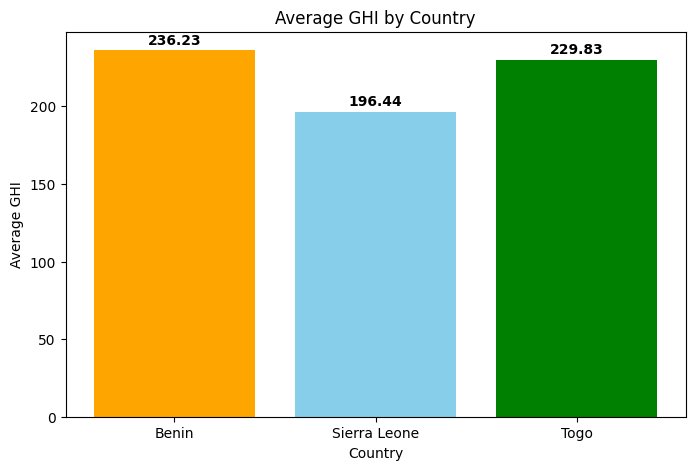

In [4]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the bar chart
plt.bar(countries, average_ghi, color=['orange', 'skyblue', 'green'])

# Add title and labels
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')

# Optional: Add value labels on top of bars
for i, val in enumerate(average_ghi):
    plt.text(i, val + 2, f'{val}', ha='center', va='bottom', fontweight='bold')

# Show the chart
plt.show()
